In [1]:
import pandas as pd
from pathlib import Path

## Read DF

In [2]:
root = Path(r"E:\MSc Works\IDS")

dnp3_train = root / "data/Custom_DNP3_Parser_Training_Balanced.csv"
dnp3_test = root / "data/Custom_DNP3_Parser_Testing_Balanced.csv"

custom_train = root / "data/CICFlowMeter_Training_Balanced.csv"
custom_test = root / "data/CICFlowMeter_Testing_Balanced.csv"

dnp3_train_df = pd.read_csv(dnp3_train)
dnp3_test_df = pd.read_csv(dnp3_test)
dnp3_train_df.columns = dnp3_train_df.columns.str.strip()
dnp3_test_df.columns = dnp3_test_df.columns.str.strip()
custom_train_df = pd.read_csv(custom_train)
custom_test_df = pd.read_csv(custom_test)

In [3]:
# shapes
dnp3_train_df.shape, custom_train_df.shape

((4194, 103), (5126, 86))

In [4]:
dnp3_train_df.Label.value_counts(), dnp3_train_df.Label.nunique()

(Label
 REPLAY                 466
 COLD_RESTART           466
 DNP3_INFO              466
 DNP3_ENUMERATE         466
 WARM_RESTART           466
 DISABLE_UNSOLICITED    466
 NORMAL                 466
 INIT_DATA              466
 STOP_APP               466
 Name: count, dtype: int64,
 9)

In [5]:
custom_train_df.Label.value_counts(), custom_train_df.Label.nunique()

(Label
 INIT_DATA              466
 DISABLE_UNSOLICITED    466
 WARM_RESTART           466
 MITM_DOS               466
 ARP_POISONING          466
 NORMAL                 466
 DNP3_ENUMERATE         466
 COLD_RESTART           466
 DNP3_INFO              466
 REPLAY                 466
 STOP_APP               466
 Name: count, dtype: int64,
 11)

## CICFLowMeter Data

In [6]:
# arp_poising and mitm are not presnet in dnp3 data

### Select Numerical Columns

In [7]:
# get list of columns
cols = custom_train_df.columns
cols

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP',
       'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',


In [8]:
# remove non numberical features
# IAT means Inter Arrival Time: time between two packets.
# features related to standard deviations have -ve in it. that should be removed or handled properly
#
valid_cols = [
    "Flow Duration",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "TotLen Fwd Pkts",
    "TotLen Bwd Pkts",
    "Fwd Pkt Len Max",
    "Fwd Pkt Len Min",
    "Fwd Pkt Len Mean",
    "Fwd Pkt Len Std",
    "Bwd Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Mean",
    "Bwd Pkt Len Std",
    "Flow Byts/s",
    "Flow Pkts/s",
    "Flow IAT Mean",
    "Flow IAT Std",
    "Flow IAT Max",
    "Flow IAT Min",
    "Fwd IAT Tot",
    "Fwd IAT Mean",
    "Fwd IAT Std",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Bwd IAT Tot",
    "Bwd IAT Mean",
    "Bwd IAT Std",
    "Bwd IAT Max",
    "Bwd IAT Min",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "Fwd Header Len",
    "Bwd Header Len",
    "Fwd Pkts/s",
    "Bwd Pkts/s",
    "Pkt Len Min",
    "Pkt Len Max",
    "Pkt Len Mean",
    "Pkt Len Std",
    "Pkt Len Var",
    "FIN Flag Cnt",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "ACK Flag Cnt",
    "URG Flag Cnt",
    "CWE Flag Count",
    "ECE Flag Cnt",
    "Down/Up Ratio",
    "Pkt Size Avg",
    "Fwd Seg Size Avg",
    "Bwd Seg Size Avg",
    "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg",
    "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg",
    "Bwd Pkts/b Avg",
    "Bwd Blk Rate Avg",
    "Subflow Fwd Pkts",
    "Subflow Fwd Byts",
    "Subflow Bwd Pkts",
    "Subflow Bwd Byts",
    "Init Fwd Win Byts",
    "Init Bwd Win Byts",
    "Fwd Act Data Pkts",
    "Fwd Seg Size Min",
    "Active Mean",
    "Active Std",
    "Active Max",
    "Active Min",
    "Idle Mean",
    "Idle Std",
    "Idle Max",
    "Idle Min",
]

### Filter cols if values are -ve or infinity

In [9]:
set(custom_train_df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [10]:
# get columns with values smaller than 0 if the value is numerical else 0
neg_cols = []
for col in cols:
    if custom_train_df[col].dtype == "float64" or custom_train_df[col].dtype == "int64":
        if (custom_train_df[col] < 0).any():
            neg_cols.append(col)

# filter df with only neg cols and neg rows
neg_df = custom_train_df[neg_cols]
neg_df = neg_df[neg_df < 0]
neg_df

,Init Fwd Win Byts,Init Bwd Win Byts
0,-1.0,NaN
1,-1.0,NaN
2,-1.0,NaN
3,NaN,NaN
4,-1.0,-1.0
...,...,...
5121,NaN,NaN
5122,-1.0,-1.0
5123,-1.0,NaN
5124,NaN,NaN


Can't use these two columns because the clearly do not have data.

In [11]:
# get columns with values infinity
inf_cols = []

for col in cols:
    if custom_train_df[col].dtype == "float64" or custom_train_df[col].dtype == "int64":
        if (custom_train_df[col] == float("inf")).any():
            inf_cols.append(col)


# get df and rows of inf cols
inf_df = custom_train_df[inf_cols]
inf_df = inf_df[inf_df == float("inf")]
inf_df

,Flow Byts/s,Flow Pkts/s
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
5121,NaN,NaN
5122,NaN,NaN
5123,NaN,NaN
5124,NaN,NaN


Can not use these two columns either.

### Correlation

In [12]:
numerical_df = custom_train_df[
    [c for c in valid_cols if c not in neg_cols and c not in inf_cols]
]
numerical_df.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Flow Duration,1.000000,0.542792,0.645158,0.641158,0.394310,0.031937,0.461620,0.297977,-0.091338,-0.718367,...,0.652538,-0.006749,0.115559,0.101564,0.134019,0.098870,0.049052,0.009874,0.047512,0.044483
Tot Fwd Pkts,0.542792,1.000000,0.153905,0.143863,-0.093683,-0.144730,-0.136232,-0.168339,-0.131947,-0.504621,...,0.159236,-0.173758,0.432421,0.157984,0.416543,0.415939,0.005331,-0.086423,-0.005339,0.040593
Tot Bwd Pkts,0.645158,0.153905,1.000000,0.990284,0.858490,0.071803,0.458431,0.268291,-0.106661,-0.260496,...,0.998476,-0.220011,-0.200651,-0.149015,-0.219398,-0.177512,-0.243814,-0.114051,-0.246877,-0.213704
TotLen Fwd Pkts,0.641158,0.143863,0.990284,1.000000,0.828173,0.194931,0.488188,0.343465,0.005811,-0.298677,...,0.992492,-0.197158,-0.204747,-0.151406,-0.223559,-0.181304,-0.227914,-0.102531,-0.230050,-0.199154
TotLen Bwd Pkts,0.394310,-0.093683,0.858490,0.828173,1.000000,-0.024882,0.367099,0.180537,-0.165108,0.170968,...,0.844250,-0.294663,-0.274596,-0.130003,-0.270207,-0.257229,-0.329050,-0.159301,-0.334013,-0.286918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.098870,0.415939,-0.177512,-0.181304,-0.257229,-0.085589,-0.167171,-0.139089,-0.037090,-0.172803,...,-0.175823,-0.035320,0.980959,0.077654,0.907573,1.000000,-0.038467,-0.017094,-0.038790,-0.033738
Idle Mean,0.049052,0.005331,-0.243814,-0.227914,-0.329050,0.041714,-0.015458,0.073099,0.089429,-0.219136,...,-0.236043,0.799189,-0.046044,-0.045285,-0.055035,-0.038467,1.000000,0.325614,0.991679,0.912547
Idle Std,0.009874,-0.086423,-0.114051,-0.102531,-0.159301,0.052859,-0.000391,0.085266,0.096852,-0.110789,...,-0.109036,0.465868,-0.020461,-0.020123,-0.024456,-0.017094,0.325614,1.000000,0.440680,-0.022397
Idle Max,0.047512,-0.005339,-0.246877,-0.230050,-0.334013,0.046080,-0.014275,0.080110,0.096756,-0.222836,...,-0.238579,0.819404,-0.046430,-0.045665,-0.055497,-0.038790,0.991679,0.440680,1.000000,0.869756


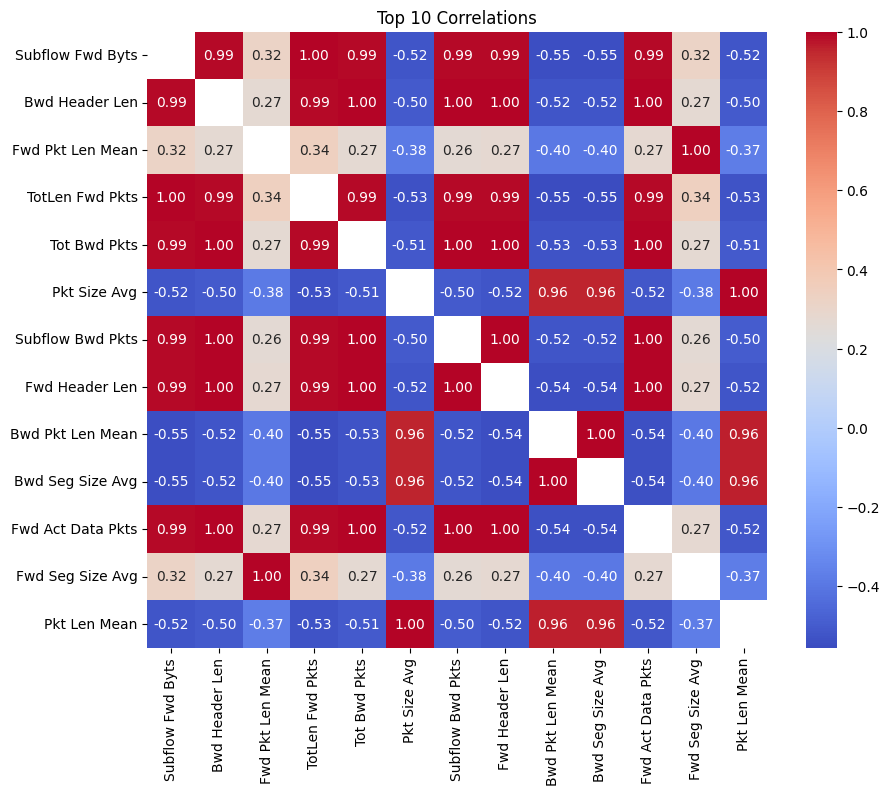

In [13]:
# prompt: plot top 10 correlations in heatmap

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Find the top 10 correlations
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
top_10_pairs = sorted_pairs.head(20)

# Extract feature names for the heatmap
top_10_features = list(
    set(
        top_10_pairs.index.get_level_values(0).tolist()
        + top_10_pairs.index.get_level_values(1).tolist()
    )
)

# Create a new correlation matrix with only the top 10 features
top_10_corr_matrix = corr_matrix.loc[top_10_features, top_10_features]


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Correlations")
plt.show()

### Auto Encoder

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from loguru import logger
import time
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler


class AutoEncoder(nn.Module):
    def __init__(self, input_size: int = 72, projection: int = 72):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, projection),
        )
        self.decoder = nn.Sequential(
            nn.Linear(projection, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def project(self, x):
        return self.encoder(x)


class AutoEncoderTrainer:
    def __init__(
        self,
        input_size: int,
        projection_dim: int,
        epochs: int = 100,
        batch_size: int = 32,
        device: str = "cpu",
        min_max_scale: bool = True,
        log_every: int = 1,
    ):
        self.epochs = epochs
        self.batch_size = batch_size
        self.device = torch.device(device)
        self.log_every = log_every
        self.min_max_scale = min_max_scale
        self.projection_dim = projection_dim
        self.input_size = input_size
        self.model = None

    def before_train(self):
        logger.info("Before Training")
        self.model = AutoEncoder(
            input_size=self.input_size, projection=self.projection_dim
        ).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()
        self.metrics = {
            "train_loss": [],
            "test_loss": [],
            "train_time": [],
            "epoch": [],
        }

    def train(self, train_features: pd.DataFrame, test_features: pd.DataFrame):
        self.before_train()
        logger.info("Starting Training")
        X_train = torch.tensor(train_features.values, dtype=torch.float32)
        X_test = torch.tensor(test_features.values, dtype=torch.float32)

        if self.min_max_scale:
            self.scaler = MinMaxScaler()
            X_train = self.scaler.fit_transform(X_train)
            X_test = self.scaler.transform(X_test)
            X_train = torch.tensor(X_train, dtype=torch.float32)
            X_test = torch.tensor(X_test, dtype=torch.float32)

        X_train = X_train.to(self.device)
        X_test = X_test.to(self.device)

        train_loader = DataLoader(
            TensorDataset(X_train), batch_size=self.batch_size, shuffle=True
        )
        test_loader = DataLoader(
            TensorDataset(X_test), batch_size=self.batch_size, shuffle=False
        )

        logger.info(f"Training on {self.device}")
        self.model = self.model.to(self.device)

        for epoch in range(self.epochs):
            self.model.train()
            epoch_loss = 0.0
            start_time = time.time()

            with tqdm(
                train_loader, desc=f"Epoch {epoch+1}/{self.epochs} [Train]"
            ) as pbar:
                for (batch,) in pbar:
                    batch = batch.to(self.device)
                    self.optimizer.zero_grad()
                    outputs = self.model(batch)
                    loss = self.loss_fn(outputs, batch)
                    loss.backward()
                    self.optimizer.step()
                    epoch_loss += loss.item()
                    pbar.set_postfix(loss=loss.item())

            avg_train_loss = epoch_loss / len(train_loader)
            end_time = time.time()

            self.model.eval()
            test_loss = 0.0
            with torch.no_grad():
                with tqdm(
                    test_loader, desc=f"Epoch {epoch+1}/{self.epochs} [Test]"
                ) as pbar:
                    for (batch,) in pbar:
                        batch = batch.to(self.device)
                        outputs = self.model(batch)
                        loss = self.loss_fn(outputs, batch)
                        test_loss += loss.item()
                        pbar.set_postfix(loss=loss.item())

            avg_test_loss = test_loss / len(test_loader)

            self.metrics["train_loss"].append(avg_train_loss)
            self.metrics["test_loss"].append(avg_test_loss)
            self.metrics["train_time"].append(end_time - start_time)
            self.metrics["epoch"].append(epoch)

            if epoch % self.log_every == 0:
                logger.info(
                    f"Epoch {epoch}: Train Loss = {avg_train_loss:.4f}, Test Loss = {avg_test_loss:.4f}"
                )

        return self.metrics

    def project(self, data: pd.DataFrame):
        if self.min_max_scale:
            data = self.scaler.transform(data)
            data = torch.tensor(data, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            X = data.to(self.device)
            encoded = self.model.project(X).cpu().numpy()
        return encoded


trainer = AutoEncoderTrainer(input_size=72, projection_dim=72, epochs=10)
labels_df = custom_train_df.Label
features_df = custom_train_df[
    [c for c in valid_cols if c not in neg_cols and c not in inf_cols]
]
test_features = custom_test_df[
    [c for c in valid_cols if c not in neg_cols and c not in inf_cols]
]
trainer.train(train_features=features_df, test_features=test_features)

2025-05-18 20:22:20.916 | INFO     | __main__:before_train:60 - Before Training
2025-05-18 20:22:22.619 | INFO     | __main__:train:75 - Starting Training
2025-05-18 20:22:22.632 | INFO     | __main__:train:96 - Training on cpu
Epoch 1/10 [Test]: 100%|██████████| 69/69 [00:00<00:00, 442.31it/s, loss=0.00269]
2025-05-18 20:22:25.435 | INFO     | __main__:train:141 - Epoch 0: Train Loss = 0.0232, Test Loss = 0.0035
Epoch 2/10 [Test]: 100%|██████████| 69/69 [00:00<00:00, 428.58it/s, loss=0.00153] 
2025-05-18 20:22:26.875 | INFO     | __main__:train:141 - Epoch 1: Train Loss = 0.0028, Test Loss = 0.0023
Epoch 3/10 [Test]: 100%|██████████| 69/69 [00:00<00:00, 408.28it/s, loss=0.00164] 
2025-05-18 20:22:28.245 | INFO     | __main__:train:141 - Epoch 2: Train Loss = 0.0019, Test Loss = 0.0016
Epoch 4/10 [Test]: 100%|██████████| 69/69 [00:00<00:00, 445.16it/s, loss=0.00116] 
2025-05-18 20:22:29.677 | INFO     | __main__:train:141 - Epoch 3: Train Loss = 0.0012, Test Loss = 0.0012
Epoch 5/10 [T

{'train_loss': [0.023164315985787592,
  0.0027572794076053844,
  0.0018858294140457852,
  0.0012461319256657792,
  0.0009398981224277681,
  0.0007373327002061606,
  0.0006127213625026207,
  0.0005176938558738499,
  0.00045500540546747505,
  0.0004200634180249282],
 'test_loss': [0.003484907306973701,
  0.002319635338305185,
  0.0016015696021276053,
  0.0012145803876869056,
  0.0009222884465893055,
  0.0007274250523735553,
  0.0005955627224782644,
  0.0005352583294565641,
  0.0005217246810164964,
  0.0004252393860108408],
 'train_time': [2.6419994831085205,
  1.2740020751953125,
  1.1969985961914062,
  1.2740015983581543,
  1.2770004272460938,
  1.1749987602233887,
  1.3270022869110107,
  1.47300124168396,
  1.3340013027191162,
  1.2440025806427002],
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

### PCA

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from loguru import logger
import time
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


class PCAProjector:
    def __init__(self, n_components: int = None, scale: bool = True):
        """
        PCA wrapper with optional MinMax scaling.

        Args:
            n_components (int): Number of PCA components.
            scale (bool): Whether to apply MinMax scaling before PCA.
        """
        self.n_components = n_components
        self.scale = scale

    def before_fit(self):
        logger.info("Before PCA Fit")
        if self.n_components is None:
            raise ValueError("Number of components must be set before fitting PCA.")
        if self.scale:
            logger.info("Scaling data with MinMaxScaler")
        else:
            logger.info("No scaling applied")
        self.pca = PCA(n_components=self.n_components)
        self.metrics = {
            "explained_variance_ratio": [],
            "fit_time": None,
            "n_components": self.n_components,
        }
        self.scaler = MinMaxScaler() if self.scale else None

    def fit_transform(self, train_features: pd.DataFrame):
        self.before_fit()
        logger.info(
            f"Starting PCA with {self.n_components} components. Scaling: {self.scale}"
        )
        X_train = train_features.values
        X_test = test_features.values

        if self.scale:
            X_train = self.scaler.fit_transform(X_train)
            X_test = self.scaler.transform(X_test)

        t_start = time.perf_counter()
        X_train_pca = self.pca.fit_transform(X_train)
        t_end = time.perf_counter()

        self.metrics["fit_time"] = t_end - t_start
        self.metrics["explained_variance_ratio"] = (
            self.pca.explained_variance_ratio_.tolist()
        )

        logger.info(f"PCA completed in {self.metrics['fit_time']:.4f}s")
        # logger.info(
        #     f"Explained variance (first {self.n_components} components): {self.metrics['explained_variance_ratio']}"
        # )

        return X_train_pca

    def project(self, data: pd.DataFrame):
        """
        Project data using the fitted PCA model.

        Args:
            data (pd.DataFrame): Data to project.

        Returns:
            np.ndarray: Projected data.
        """
        if self.scale:
            data = self.scaler.transform(data)
        return self.pca.transform(data)


projector = PCAProjector(n_components=72, scale=True)
projector.fit_transform(features_df)

train_projected = projector.project(features_df)
test_projected = projector.project(test_features)

2025-05-18 20:22:38.889 | INFO     | __main__:before_fit:25 - Before PCA Fit
2025-05-18 20:22:38.891 | INFO     | __main__:before_fit:29 - Scaling data with MinMaxScaler
2025-05-18 20:22:38.891 | INFO     | __main__:fit_transform:42 - Starting PCA with 72 components. Scaling: True
2025-05-18 20:22:38.907 | INFO     | __main__:fit_transform:61 - PCA completed in 0.0083s


### RFE

In [16]:
np.flatnonzero([i in [0, 1, 2, 3] for i in range(5)])

array([0, 1, 2, 3], dtype=int64)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


class RFE:

    def __init__(
        self,
        model_cls,
        train_features: pd.DataFrame,
        train_labels: pd.Series,
        test_features: pd.DataFrame,
        test_labels: pd.Series,
        num_steps: int = 72,
        stopping_score: float = 0.5,
    ):

        self.model_cls = model_cls

        self.train_features = train_features

        self.train_labels = train_labels

        self.test_features = test_features

        self.test_labels = test_labels

        self.num_steps = num_steps

        self.stopping_score = stopping_score

        self.result = []

        self.curr_step = 0

        self.feature_mask = None

        self.orig_feature_names = train_features.columns.tolist()

        self.scaler = MinMaxScaler()

        self.scaler.fit(self.train_features)

        self.train_features = self.scaler.transform(self.train_features)

        self.test_features = self.scaler.transform(self.test_features)

    def fit(self, feature_names: list | None = None):

        if feature_names is None:
            feature_names = self.orig_feature_names

        # init feat mask

        feature_mask = np.array([f in feature_names for f in self.orig_feature_names])

        t_start = time.perf_counter()

        x_train_sel = self.train_features[:, feature_mask]

        x_test_sel = self.test_features[:, feature_mask]

        current_indices = np.flatnonzero(feature_mask)

        current_feature_names = [self.orig_feature_names[i] for i in current_indices]

        logger.info(f"Current feature shape: {x_train_sel.shape}")

        # Train model

        model = self.model_cls()

        t0 = time.perf_counter()

        model.fit(x_train_sel, self.train_labels)

        logger.info(f"Training time: {time.perf_counter() - t0:.4f}s")

        # Evaluate

        score = model.score(x_test_sel, self.test_labels)

        logger.info(f"Score: {score:.4f}")

        importances = model.feature_importances_

        max_i = importances.argmax()

        min_i = importances.argmin()

        logger.info(
            f"Max importance: {importances[max_i]:.4f} ({current_feature_names[max_i]})"
        )

        logger.info(
            f"Min importance: {importances[min_i]:.4f} ({current_feature_names[min_i]})"
        )

        # Stopping criteria

        if score < self.stopping_score:

            logger.info(
                f"Score dropped below stopping threshold of {self.stopping_score}"
            )
            return

        if self.curr_step >= self.num_steps - 1:

            logger.info(f"Reached max number of steps: {self.num_steps}")
            return

        if feature_mask.sum() == 1:

            logger.info(f"Only one feature left, stopping")
            return

        # Eliminate least important feature

        remove_global_idx = current_indices[min_i]

        removed_feature_name = self.orig_feature_names[remove_global_idx]

        feature_mask[remove_global_idx] = False

        self.result.append(
            [
                self.curr_step,
                removed_feature_name,
                current_feature_names[max_i],
                current_feature_names[min_i],
                importances[max_i],
                importances[min_i],
                score,
                x_test_sel.shape[1],
            ]
        )

        logger.info(f"Removed feature: {removed_feature_name}")

        self.curr_step += 1

        logger.info(f"Total time: {time.perf_counter() - t_start:.4f}s")

        self.current_feature_names = [
            self.orig_feature_names[i] for i in np.flatnonzero(feature_mask)
        ]

        self.feature_mask = feature_mask

        return self.result, self.current_feature_names

    def project(self, data: pd.DataFrame):

        if self.scaler is not None:

            data = self.scaler.transform(data)

        data = data[:, self.feature_mask]

        return data


test_labels = custom_test_df.Label

rfe = RFE(RandomForestClassifier, features_df, labels_df, test_features, test_labels)

res, feat_names = rfe.fit()

2025-05-18 20:22:39.255 | INFO     | __main__:fit:67 - Current feature shape: (5126, 72)
2025-05-18 20:22:41.031 | INFO     | __main__:fit:77 - Training time: 1.7743s
2025-05-18 20:22:41.069 | INFO     | __main__:fit:83 - Score: 0.8268
2025-05-18 20:22:41.079 | INFO     | __main__:fit:91 - Max importance: 0.0477 (Flow IAT Max)
2025-05-18 20:22:41.080 | INFO     | __main__:fit:95 - Min importance: 0.0000 (Fwd URG Flags)
2025-05-18 20:22:41.081 | INFO     | __main__:fit:139 - Removed feature: Fwd URG Flags
2025-05-18 20:22:41.081 | INFO     | __main__:fit:143 - Total time: 1.8272s


### Comparing RFE, AE, PCA

In [18]:
def perform_feature_selection(
    features_df: pd.DataFrame,
    labels_df: pd.Series,
    test_features: pd.DataFrame,
    test_labels: pd.Series,
):
    num_features = len(features_df.columns)
    rfe = RFE(
        RandomForestClassifier,
        features_df,
        labels_df,
        test_features,
        test_labels,
        num_steps=num_features,
    )

    pca_projector = PCAProjector(n_components=num_features, scale=True)
    ae_trainer = AutoEncoderTrainer(
        input_size=num_features, projection_dim=num_features, epochs=2
    )
    selected_features = features_df.columns.tolist()

    experiment_results = {"rfe": [], "pca": [], "ae": []}
    for step in range(1, len(selected_features) + 1):
        logger.info(f"\nRunning Step {step}")
        curr_num_features = num_features - step
        if curr_num_features <= 1:
            break
        # train
        ae_trainer.projection_dim = curr_num_features
        pca_projector.n_components = curr_num_features
        res, selected_features = rfe.fit(feature_names=selected_features)
        pca_projector.fit_transform(features_df)
        ae_trainer.train(
            train_features=features_df,
            test_features=test_features,
        )

        # projection
        rfe_train = rfe.project(features_df)
        rfe_test = rfe.project(test_features)
        pca_train = pca_projector.project(features_df)
        pca_test = pca_projector.project(test_features)
        ae_train = ae_trainer.project(features_df)
        ae_test = ae_trainer.project(test_features)

        assert rfe_train.shape[1] == pca_train.shape[1] == ae_train.shape[1]
        assert rfe_test.shape[1] == pca_test.shape[1] == ae_test.shape[1]

        # train model
        model = RandomForestClassifier()
        model.fit(rfe_train, labels_df)
        rfe_score = model.score(rfe_test, test_labels)
        experiment_results["rfe"].append(rfe_score)

        model = RandomForestClassifier()
        model.fit(pca_train, labels_df)
        pca_score = model.score(pca_test, test_labels)
        experiment_results["pca"].append(pca_score)
        model = RandomForestClassifier()
        model.fit(ae_train, labels_df)
        ae_score = model.score(ae_test, test_labels)
        experiment_results["ae"].append(ae_score)

        logger.info(
            f"Step {step}: Feature Shape: {rfe_train.shape}, RFE Score = {rfe_score:.4f}, PCA Score = {pca_score:.4f}, AE Score = {ae_score:.4f}"
        )
    return experiment_results


experiment_results = perform_feature_selection(
    features_df,
    labels_df,
    test_features,
    test_labels,
)


res_df = pd.DataFrame(
    experiment_results,
    index=[i for i in range(len(experiment_results["rfe"]))],
)
res_df

2025-05-18 20:22:41.116 | INFO     | __main__:perform_feature_selection:25 - 
Running Step 1
2025-05-18 20:22:41.120 | INFO     | __main__:fit:67 - Current feature shape: (5126, 72)


2025-05-18 20:22:42.853 | INFO     | __main__:fit:77 - Training time: 1.7323s
2025-05-18 20:22:42.896 | INFO     | __main__:fit:83 - Score: 0.8264
2025-05-18 20:22:42.908 | INFO     | __main__:fit:91 - Max importance: 0.0494 (Flow IAT Max)
2025-05-18 20:22:42.910 | INFO     | __main__:fit:95 - Min importance: 0.0000 (Fwd URG Flags)
2025-05-18 20:22:42.911 | INFO     | __main__:fit:139 - Removed feature: Fwd URG Flags
2025-05-18 20:22:42.912 | INFO     | __main__:fit:143 - Total time: 1.7935s
2025-05-18 20:22:42.915 | INFO     | __main__:before_fit:25 - Before PCA Fit
2025-05-18 20:22:42.915 | INFO     | __main__:before_fit:29 - Scaling data with MinMaxScaler
2025-05-18 20:22:42.917 | INFO     | __main__:fit_transform:42 - Starting PCA with 71 components. Scaling: True
2025-05-18 20:22:42.932 | INFO     | __main__:fit_transform:61 - PCA completed in 0.0078s
2025-05-18 20:22:42.935 | INFO     | __main__:before_train:60 - Before Training
2025-05-18 20:22:42.939 | INFO     | __main__:train

,rfe,pca,ae
0,0.822273,0.844091,0.835909
1,0.823636,0.838182,0.837727
2,0.822273,0.843636,0.837273
3,0.825909,0.842273,0.838182
4,0.827727,0.839545,0.838182
...,...,...,...
65,0.800455,0.829091,0.833636
66,0.800909,0.835455,0.831364
67,0.801818,0.821818,0.836818
68,0.795455,0.825000,0.840455


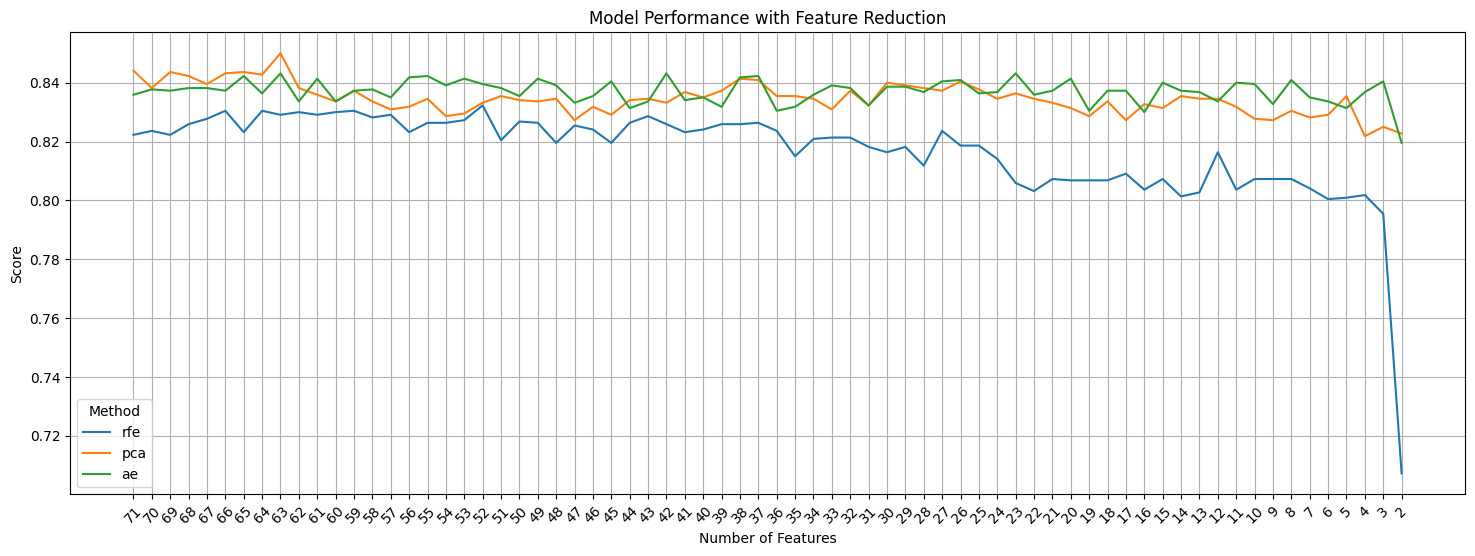

In [19]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 6))
sns.lineplot(data=res_df, dashes=False)
plt.title("Model Performance with Feature Reduction")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.xticks(np.arange(len(res_df)), np.arange(len(res_df))[::-1] + 2, rotation=45)
plt.legend(title="Method")
plt.grid()
plt.show()

In [31]:
40.51 * 155

6279.049999999999

## DNP3 Data

In [20]:
# get columns with values smaller than 0 if the value is numerical else 0
neg_cols = []
cols = dnp3_train_df.columns
for col in cols:
    if dnp3_train_df[col].dtype == "float64" or dnp3_train_df[col].dtype == "int64":
        if (dnp3_train_df[col] < 0).any():
            neg_cols.append(col)

# filter df with only neg cols and neg rows
neg_df = dnp3_train_df[neg_cols]
neg_df = neg_df[neg_df < 0]
neg_df
# get columns with values infinity
inf_cols = []

for col in cols:
    if dnp3_train_df[col].dtype == "float64" or dnp3_train_df[col].dtype == "int64":
        if (dnp3_train_df[col] == float("inf")).any():
            inf_cols.append(col)

# only numerical features
num_cols = []
for col in cols:
    if dnp3_train_df[col].dtype == "float64" or dnp3_train_df[col].dtype == "int64":
        if col not in neg_cols and col not in inf_cols:
            num_cols.append(col)


# get df and rows of inf cols
inf_df = dnp3_train_df[inf_cols]

inf_df = inf_df[inf_df == float("inf")]

In [21]:
dnp3_train_df.Label

0               REPLAY
1         COLD_RESTART
2         COLD_RESTART
3            DNP3_INFO
4       DNP3_ENUMERATE
             ...      
4189            REPLAY
4190            REPLAY
4191    DNP3_ENUMERATE
4192         INIT_DATA
4193      WARM_RESTART
Name: Label, Length: 4194, dtype: object

In [22]:
labels_df = dnp3_train_df.Label
invalid_cols = [
    "Unnamed: 0.1",
    "Unnamed: 0",
    "source port",
    "destination port",
    "protocol",
    "flow ID",
    "flow number",
]

features_df = dnp3_train_df[
    [
        c
        for c in cols
        if c not in neg_cols
        and c not in inf_cols
        and c != "Label"
        and c in num_cols
        and c not in invalid_cols
    ]
]
test_features = dnp3_test_df[
    [
        c
        for c in cols
        if c not in neg_cols
        and c not in inf_cols
        and c != "Label"
        and c in num_cols
        and c not in invalid_cols
    ]
]
test_labels = dnp3_test_df.Label

In [23]:
dnp3_train_df.shape, features_df.shape

((4194, 103), (4194, 75))

In [24]:
experiment_results = perform_feature_selection(
    features_df,
    labels_df,
    test_features,
    test_labels,
)
res_df = pd.DataFrame(
    experiment_results,
    index=[i for i in range(len(experiment_results["rfe"]))],
)

res_df

2025-05-18 20:38:45.587 | INFO     | __main__:perform_feature_selection:25 - 
Running Step 1
2025-05-18 20:38:45.590 | INFO     | __main__:fit:67 - Current feature shape: (4194, 75)


2025-05-18 20:38:47.033 | INFO     | __main__:fit:77 - Training time: 1.4426s
2025-05-18 20:38:47.070 | INFO     | __main__:fit:83 - Score: 0.7733
2025-05-18 20:38:47.082 | INFO     | __main__:fit:91 - Max importance: 0.0470 (FlowIAT_MAX)
2025-05-18 20:38:47.084 | INFO     | __main__:fit:95 - Min importance: 0.0000 (corruptConfigFragments)
2025-05-18 20:38:47.085 | INFO     | __main__:fit:139 - Removed feature: corruptConfigFragments
2025-05-18 20:38:47.086 | INFO     | __main__:fit:143 - Total time: 1.4975s
2025-05-18 20:38:47.089 | INFO     | __main__:before_fit:25 - Before PCA Fit
2025-05-18 20:38:47.090 | INFO     | __main__:before_fit:29 - Scaling data with MinMaxScaler
2025-05-18 20:38:47.091 | INFO     | __main__:fit_transform:42 - Starting PCA with 74 components. Scaling: True
2025-05-18 20:38:47.106 | INFO     | __main__:fit_transform:61 - PCA completed in 0.0076s
2025-05-18 20:38:47.107 | INFO     | __main__:before_train:60 - Before Training
2025-05-18 20:38:47.110 | INFO    

,rfe,pca,ae
0,0.774444,0.776111,0.778889
1,0.776667,0.774444,0.779444
2,0.773333,0.771667,0.777778
3,0.777222,0.782222,0.773333
4,0.781667,0.770556,0.772778
...,...,...,...
68,0.753333,0.776111,0.780556
69,0.743333,0.782222,0.772222
70,0.734444,0.776111,0.768889
71,0.736111,0.771667,0.772778


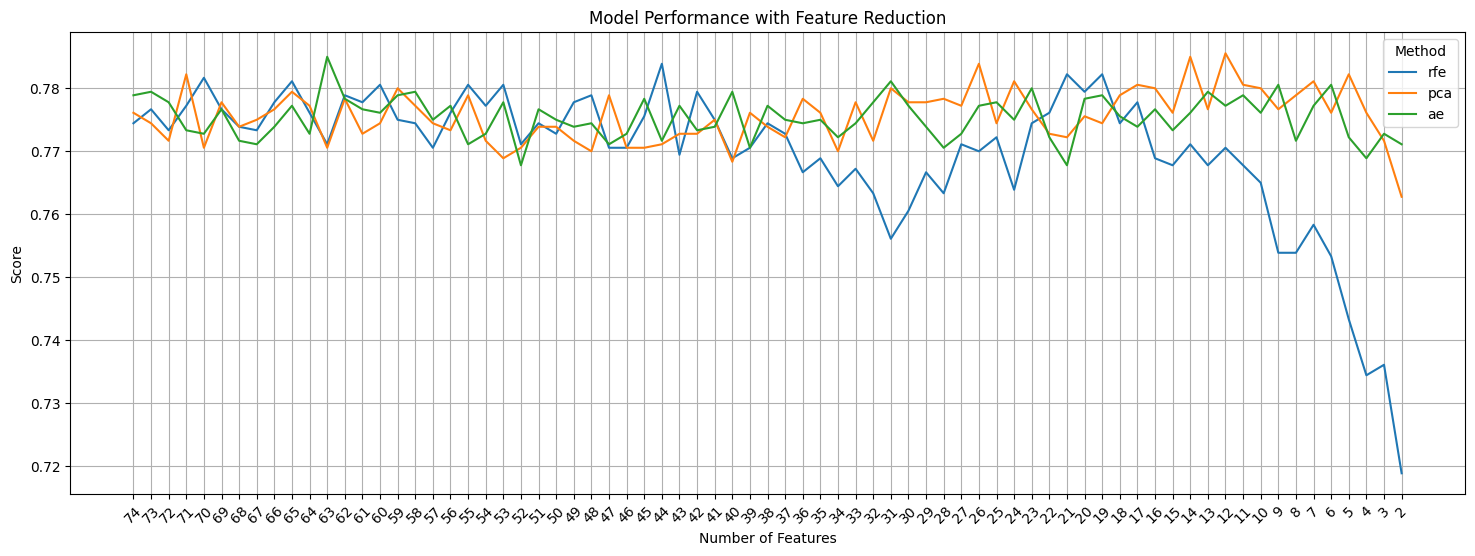

In [26]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 6))
sns.lineplot(data=res_df, dashes=False)
plt.title("Model Performance with Feature Reduction")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.xticks(np.arange(len(res_df)), np.arange(len(res_df))[::-1] + 2, rotation=45)
plt.legend(title="Method")
plt.grid()
plt.show()